### LOGISTIC REGRESSION

In [1]:
import numpy as np
import pandas as pd

from IPython.display import display
#http://python.6.x6.nabble.com/IPython-User-ipython-notebook-how-to-display-image-not-from-pylab-td4497427.html

# plotting modules
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

pd.set_option('display.max_columns', None)

In [6]:
df= 'C:/Users/mjors_000/Desktop/ECON628-01-berenger92/datasets/cell_phone_churn/cell_phone_churn.csv'
df= pd.read_csv(df)

In [7]:
df.head(2)

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [10]:
df.isnull().sum()

state             0
account_length    0
area_code         0
intl_plan         0
vmail_plan        0
vmail_message     0
day_mins          0
day_calls         0
day_charge        0
eve_mins          0
eve_calls         0
eve_charge        0
night_mins        0
night_calls       0
night_charge      0
intl_mins         0
intl_calls        0
intl_charge       0
custserv_calls    0
churn             0
dtype: int64

In [11]:
#Now we assign values of 0 if republican won, and 1 if lost
df['intl_plan'] = df['intl_plan'].map(lambda value: 0 if value == "no" else 1 )
df.head(2)

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,KS,128,415,0,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,0,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [12]:
#Count number of values per class/category
df.intl_plan.value_counts()


0    3010
1     323
Name: intl_plan, dtype: int64

In [13]:
#This creates the dataset into dummies
df_dummies = pd.get_dummies(df)
df_dummies.head(3)


,account_length,area_code,intl_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,vmail_plan_no,vmail_plan_yes
0,128,415,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,107,415,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,137,415,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [17]:
## Define X 
y = df_dummies['intl_plan']
columns_= df_dummies.columns.tolist()
exclude_col = ['intl_plan'] 
#TO EXCLUDE SOME VAR FROM THE WHOLE DATA FRAME
X = df_dummies[[i for i in columns_ if i not in exclude_col]]
print (X.shape)
print (y.shape)


(3333, 70)
(3333L,)


In [20]:
#Split the data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=15)
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(1999, 70)
(1999L,)
(1334, 70)
(1334L,)


In [21]:
#Call the logistic function
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

#set up parameters for the gridsearch I am using all the posible choices read documentation
Cs = np.logspace(0.0, 5.0, 20)



In [22]:
#WE ARE CREATING A DICTIONNARY THAT WILL FIND THE BEST MODEL FOR THE METHOD YOU CHOOSE (LASSO, RIDGE, ELASTICNET..)
search_parameters = {
                    "penalty": ['l1','l2'],   
                    # Used to specify the norm used in the penalization.
                    
                    "C": Cs,  #Find the lambda value
                    # Regularization parameter
                    # "dual":[True, False], # Dual or primal formulation. Dual formulation is only implemented for l2 
                    # penalty with liblinear solver. Prefer dual=False when n_samples > n_features
                    
                    "fit_intercept": [False, True], 
                    # Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
                    
                    "class_weight": [None, "balanced"], 
                    # The “balanced” mode uses the values of y to automatically adjust weights inversely 
                    # proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
                    
                    "intercept_scaling": [2, 1], 
                    # Useful only if solver is liblinear. when self.fit_intercept is True, instance vector x becomes 
                    # [x, self.intercept_scaling], i.e. a “synthetic” feature with constant value equals to intercept_scaling 
                    # is appended to the instance vector. 
                    
                    "solver":  ['liblinear']
}
'''Gridsearch your parameters''' #This is used to cross validate your findings in different sets of data
from sklearn.grid_search import GridSearchCV
estimator = GridSearchCV(logistic, search_parameters, cv=5, verbose=1, n_jobs=-1)



C:\Users\mjors_000\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [23]:
#Fitting your data
estimator.fit(X_train, y_train)
##which one is the best estimator (ACCURACY SCORE) IN REGRESSION (LASSO, RIDGE...), WE CALCULATE MSE INSTEAD

best = estimator.best_estimator_
print "Best estimators on the left out data:\n", best
print "\nBest C / Regularization Param on the left out data:\n", estimator.best_estimator_.C 
print "\nBest Params on hold out data (train):\n", estimator.best_params_
##Parameter setting that gave the best results on the hold out data.

print "\nBest Score on left out data:%.3f \n" % estimator.best_score_
## Score of best_estimator on the left out data.


Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed: 13.2min finished


Best estimators on the left out data:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Best C / Regularization Param on the left out data:
1.0

Best Params on hold out data (train):
{'C': 1.0, 'intercept_scaling': 1, 'fit_intercept': True, 'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None}

Best Score on left out data:0.913 



In [24]:
#Baseline
#Remember that 0 is republican 1 is democrat
print df_dummies['intl_plan'].value_counts(), "\n" 
print "if I randomly choose, %.0f percent of the time I will be choosing democrat " % ((np.mean(df_dummies['intl_plan']))*100)


0    3010
1     323
Name: intl_plan, dtype: int64 

if I randomly choose, 10 percent of the time I will be choosing democrat 


In [25]:
# Load Confusion Matrix package
from sklearn.metrics import confusion_matrix

#This is the simplistic way to run a confusion Matrix
y_pred=estimator.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confmat

#Pass it to a dataframe
confusion = pd.DataFrame(confmat, index=['True_Label_0 No Intern Plan', 'True_Label_1 Intern Plan'],
                         columns=['Predict_Label_0 No Intern Plan', 'Predict_Label_1 Intern Plan'])
confusion


,Predict_Label_0 No Intern Plan,Predict_Label_1 Intern Plan
True_Label_0 No Intern Plan,1185,3
True_Label_1 Intern Plan,141,5


In [26]:
## Accuracy
## How often is the classifier correct?
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print "Accuracy score: %.3f" %(acc*100)


Accuracy score: 89.205


In [33]:
#function ix helps locating specific cells in the confusion matrix to use further for Error rate
TP = confusion.ix['True_Label_0 No Intern Plan', 'Predict_Label_0 No Intern Plan']  
FP = confusion.ix['True_Label_1 Intern Plan', 'Predict_Label_0 No Intern Plan']
TN = confusion.ix['True_Label_1 Intern Plan', 'Predict_Label_1 Intern Plan']
FN = confusion.ix['True_Label_0 No Intern Plan', 'Predict_Label_1 Intern Plan']
print(zip(['True Positives','False Positives','True Negatives','False Negatives'],
          [TP, FP, TN, FN]))

[('True Positives', 1185), ('False Positives', 141), ('True Negatives', 5), ('False Negatives', 3)]


In [34]:


## Misclassification Rate (Error Rate)
## How often is the model wrong
print "Error rate: %.3f" % (((FP + FN))/ float(len(y_test))*100)


Error rate: 10.795


In [28]:
## Precision
## Ability of the classifier to avoid labeling a class as a member of another class
from sklearn.metrics import precision_score
pcs = precision_score(y_test, y_pred)
print "Precision: %.3f" %(pcs*100)


Precision: 62.500


In [29]:
## Recall
## Recall the ability of the classifier to correctly identify the current class
from sklearn.metrics import recall_score
rcs = recall_score(y_test, y_pred)
print "Recall: %.3f" % (rcs*100)


Recall: 3.425


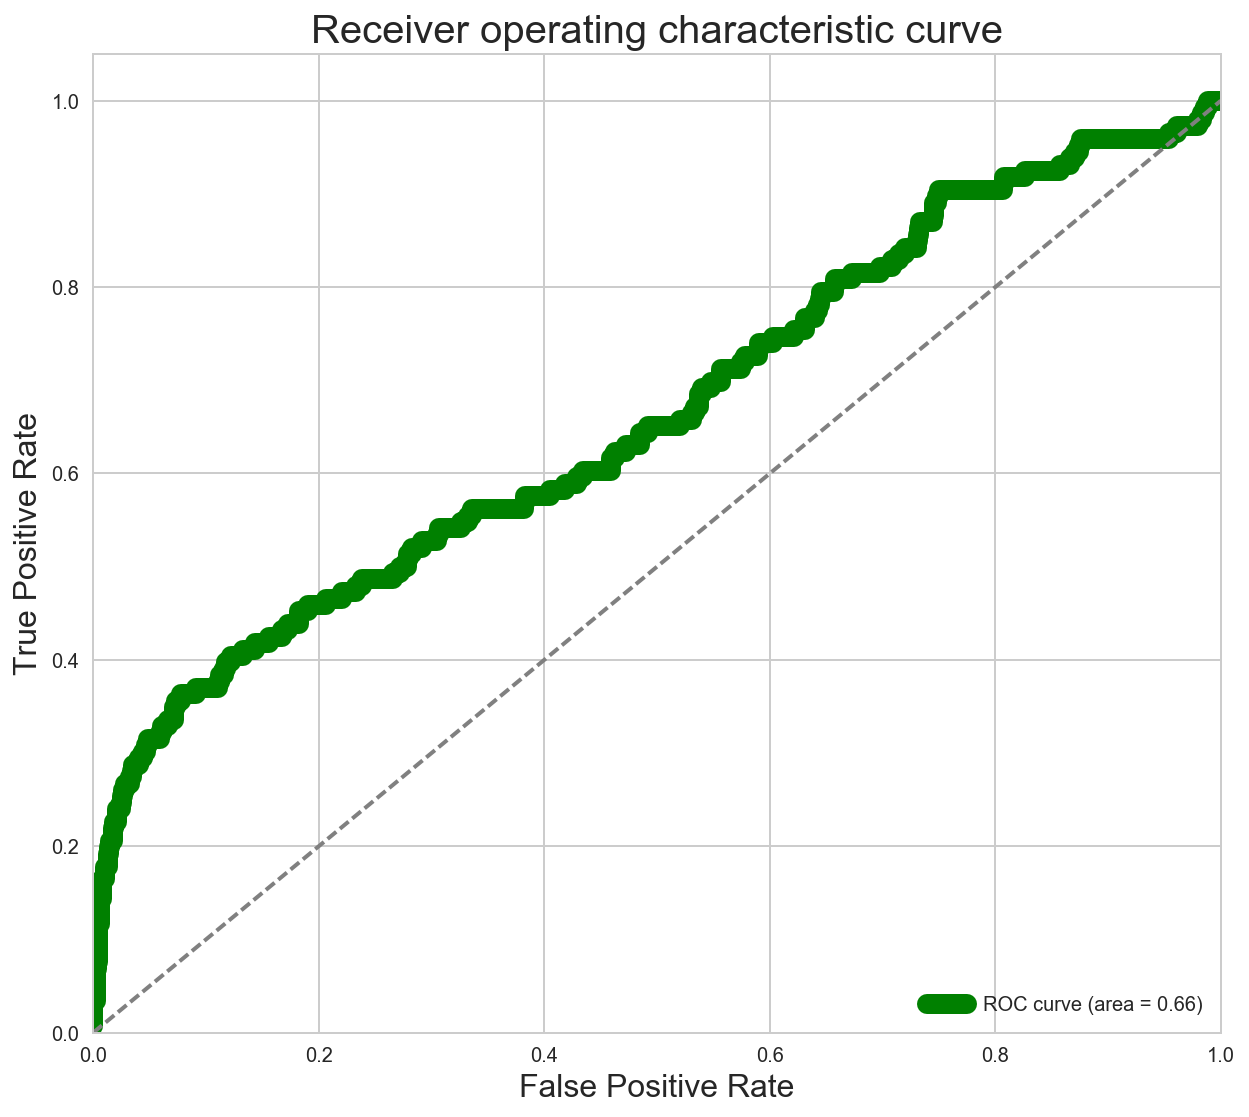

In [30]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = estimator.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()
